# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Lis Wahyuni
- Email: liswyuni@gmail.com
- Id Dicoding: liswahyuni

## Persiapan

### Menyiapkan library yang dibutuhkan

In [98]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
import pickle

### Menyiapkan data yang akan digunakan

In [99]:
df_raw = pd.read_csv("data.csv", sep=";")
df_raw.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [100]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [101]:
df_raw.isnull().sum().sum()

0

Data has no missing values.

In [102]:
num_cols = [
    'Application_order',              # Order of application (0-9)
    'Previous_qualification_grade',    # Grade of previous qualification (0-200)
    'Admission_grade',                # Admission grade (0-200)
    'Age_at_enrollment',              # Age when enrolled
    'Curricular_units_1st_sem_credited',    # Number of credited units in 1st semester
    'Curricular_units_1st_sem_enrolled',    # Number of enrolled units in 1st semester
    'Curricular_units_1st_sem_evaluations', # Number of evaluations in 1st semester
    'Curricular_units_1st_sem_approved',    # Number of approved units in 1st semester
    'Curricular_units_1st_sem_grade',       # Grades in 1st semester
    'Curricular_units_1st_sem_without_evaluations', # Units without evaluations in 1st semester
    'Curricular_units_2nd_sem_credited',    # Number of credited units in 2nd semester
    'Curricular_units_2nd_sem_enrolled',    # Number of enrolled units in 2nd semester
    'Curricular_units_2nd_sem_evaluations', # Number of evaluations in 2nd semester
    'Curricular_units_2nd_sem_approved',    # Number of approved units in 2nd semester
    'Curricular_units_2nd_sem_grade',       # Grades in 2nd semester
    'Curricular_units_2nd_sem_without_evaluations', # Units without evaluations in 2nd semester
    'Unemployment_rate',              # Unemployment rate
    'Inflation_rate',                # Inflation rate
    'GDP'                            # Gross Domestic Product
]

cat_cols = [
    'Marital_status',
    'Application_mode',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Nacionality',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Displaced',
    'Educational_special_needs',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder',
    'International',
    'Status'
]

## 1. EDA Univariate

In [103]:
# Numerical Variables
print("\nNumerical Variables Summary Statistics:")
df_raw[num_cols].describe()


Numerical Variables Summary Statistics:


,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,1.313793,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,0.000000,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,2.000000,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,9.000000,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000





          
Based on the descriptive statistics of numerical variables, here are several key insights:

1. **Student Demographics**:
   - Average age at enrollment is 23 years
   - Age range is very wide: 17-70 years
   - 50% of students are between 19-25 years old (1st and 3rd quartiles)

2. **Qualifications and Admission Grades**:
   - Average previous qualification grade: 132.61 (out of 200)
   - Average admission grade: 126.98 (out of 200)
   - Minimum grade for both is 95
   - Maximum grade for both is 190

3. **First Semester Performance**:
   - Students take an average of 6.27 courses
   - Average of 8.30 evaluations taken
   - Average of 4.71 courses passed
   - Average grade: 10.64
   - About 75% of students score above 11.0

4. **Second Semester Performance**:
   - Average of 6.23 courses taken (slight decrease)
   - Average of 8.06 evaluations taken (slight decrease)
   - Average of 4.44 courses passed (slight decrease)
   - Average grade: 10.23 (slight decrease)

5. **Economic Factors**:
   - Unemployment rate ranges from 7.6% to 16.2% (average 11.57%)
   - Inflation ranges from -0.8% to 3.7% (average 1.23%)
   - GDP ranges from -4.06% to 3.51% (average 0.002%)

6. **Interesting Patterns**:
   - Slight decline in performance from first to second semester
   - High variation (std) in units taken and evaluated
   - Most students take 5-7 courses per semester (based on quartiles)
   - Course pass rate is approximately 75% (comparing approved vs enrolled)

7. **Notable Outliers**:
   - Some students take up to 26 courses in first semester
   - Some students undergo up to 45 evaluations in first semester
   - Some students take no courses at all (min = 0)


1. Univariate Analysis


/var/folders/s5/m528_dfj42ggvtqwcz6_rrgh0000gn/T/ipykernel_10277/3685665105.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


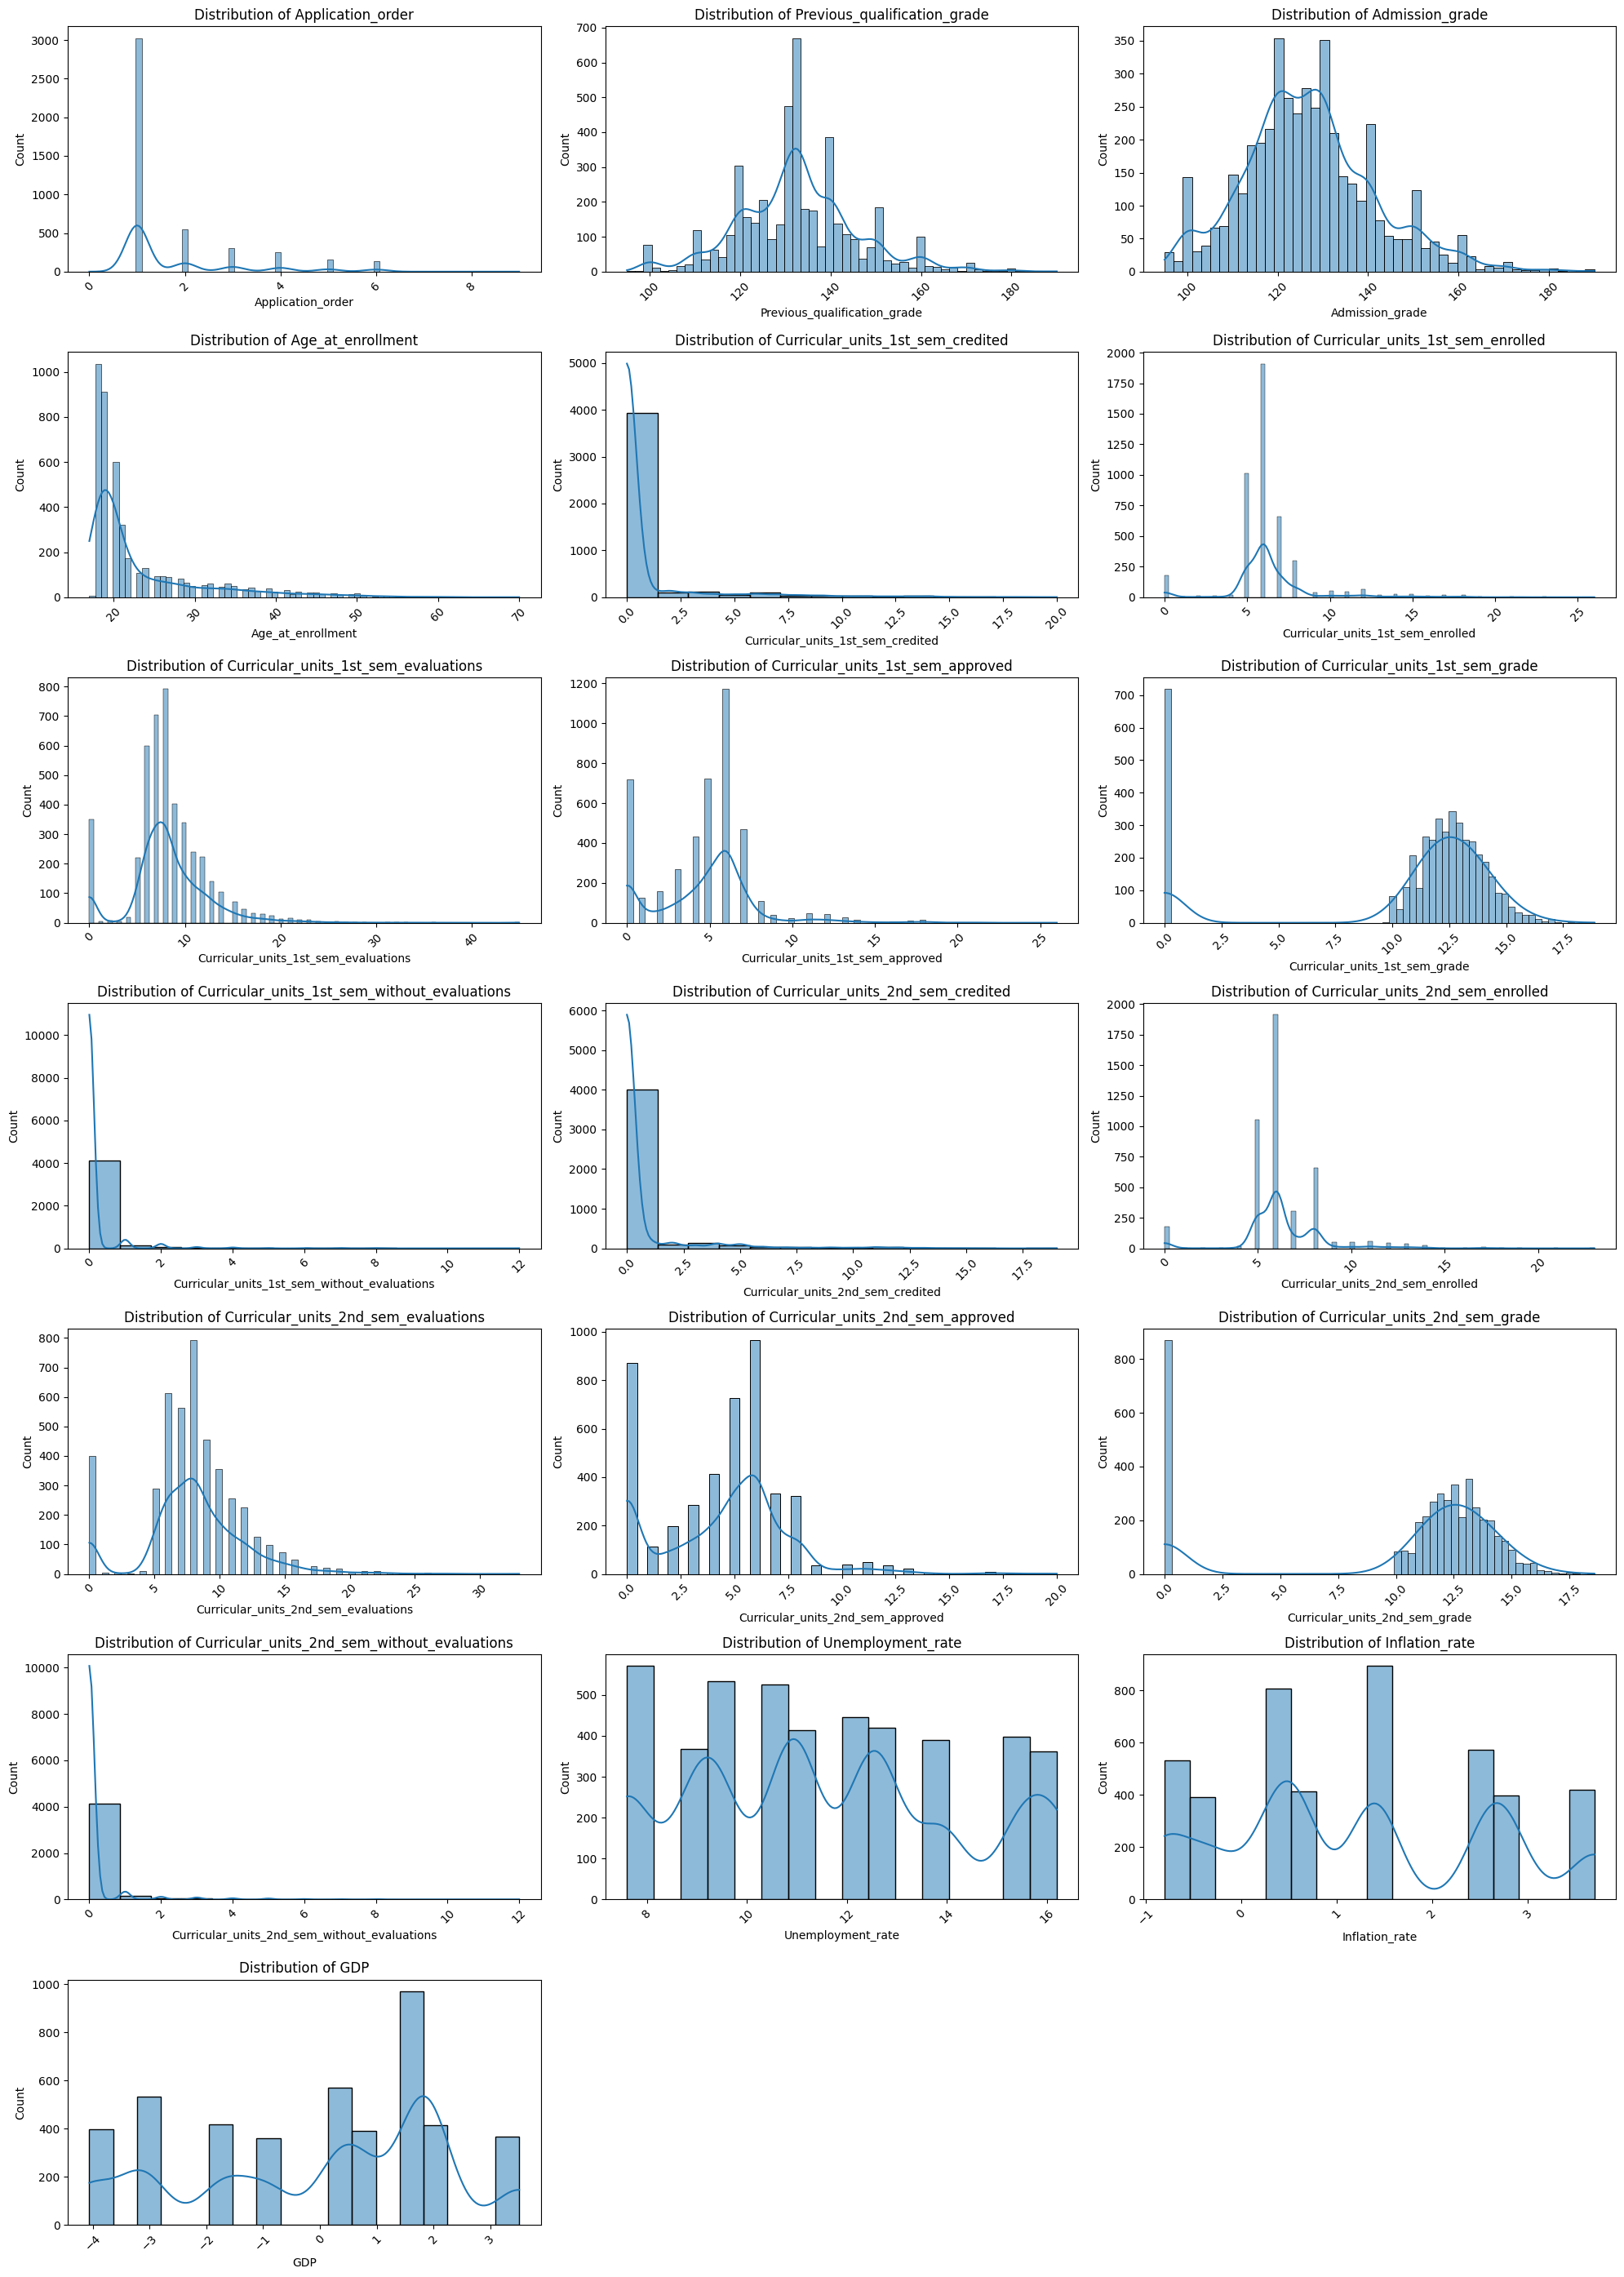

In [104]:
# 1. Univariate Analysis
def plot_numeric_distributions(df, variables, n_cols=3):
    n_vars = len(variables)
    n_rows = (n_vars + n_cols - 1) // n_cols
    
    fig = plt.figure(figsize=(20, 4*n_rows))
    for i, var in enumerate(variables, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(data=df, x=var, kde=True)
        plt.title(f'Distribution of {var}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    fig.show()

print("\n1. Univariate Analysis")
plot_numeric_distributions(df_raw, num_cols)

Analysis of the distribution plots reveals several important patterns:

1. **Application Order**:
   - Strong left-skewed distribution
   - Most students apply in their 1st or 2nd choice
   - Very few applications beyond the 5th choice

2. **Previous Qualification and Admission Grades**:
   - Both show approximately normal distributions
   - Previous qualification grades cluster around 130-140
   - Admission grades show a slightly wider spread
   - Both have clear minimum (95) and maximum (190) boundaries

3. **Age at Enrollment**:
   - Highly right-skewed distribution
   - Large concentration of students between 17-25 years
   - Long tail extending to 70 years, indicating some mature students

4. **Curricular Units (1st and 2nd Semester)**:
   - Credited units: Most students have 0 credits, with few having more
   - Enrolled units: Peaks around 5-7 units per semester
   - Evaluations: Bimodal distribution, peaks around 6-8 and 12-14
   - Approved units: Right-skewed, most passing 4-6 units
   - Grades: Normal distribution centered around 12-13
   - Without evaluations: Highly skewed, most having 0

5. **Economic Indicators**:
   - Unemployment rate: Multimodal distribution with peaks at 8%, 11%, and 15%
   - Inflation rate: Irregular distribution with multiple peaks
   - GDP: Fluctuating pattern with both positive and negative values

6. **Notable Patterns**:
   - Academic performance metrics show similar patterns between semesters
   - Grade distributions are approximately normal in both semesters
   - Most students maintain consistent course loads across semesters
   - Economic indicators show cyclical patterns

7. **Potential Outliers**:
   - Students over 40 years old
   - Those taking more than 15 curricular units
   - Extremely high or low grades (below 5 or above 18)
   - Students with no evaluations or approvals

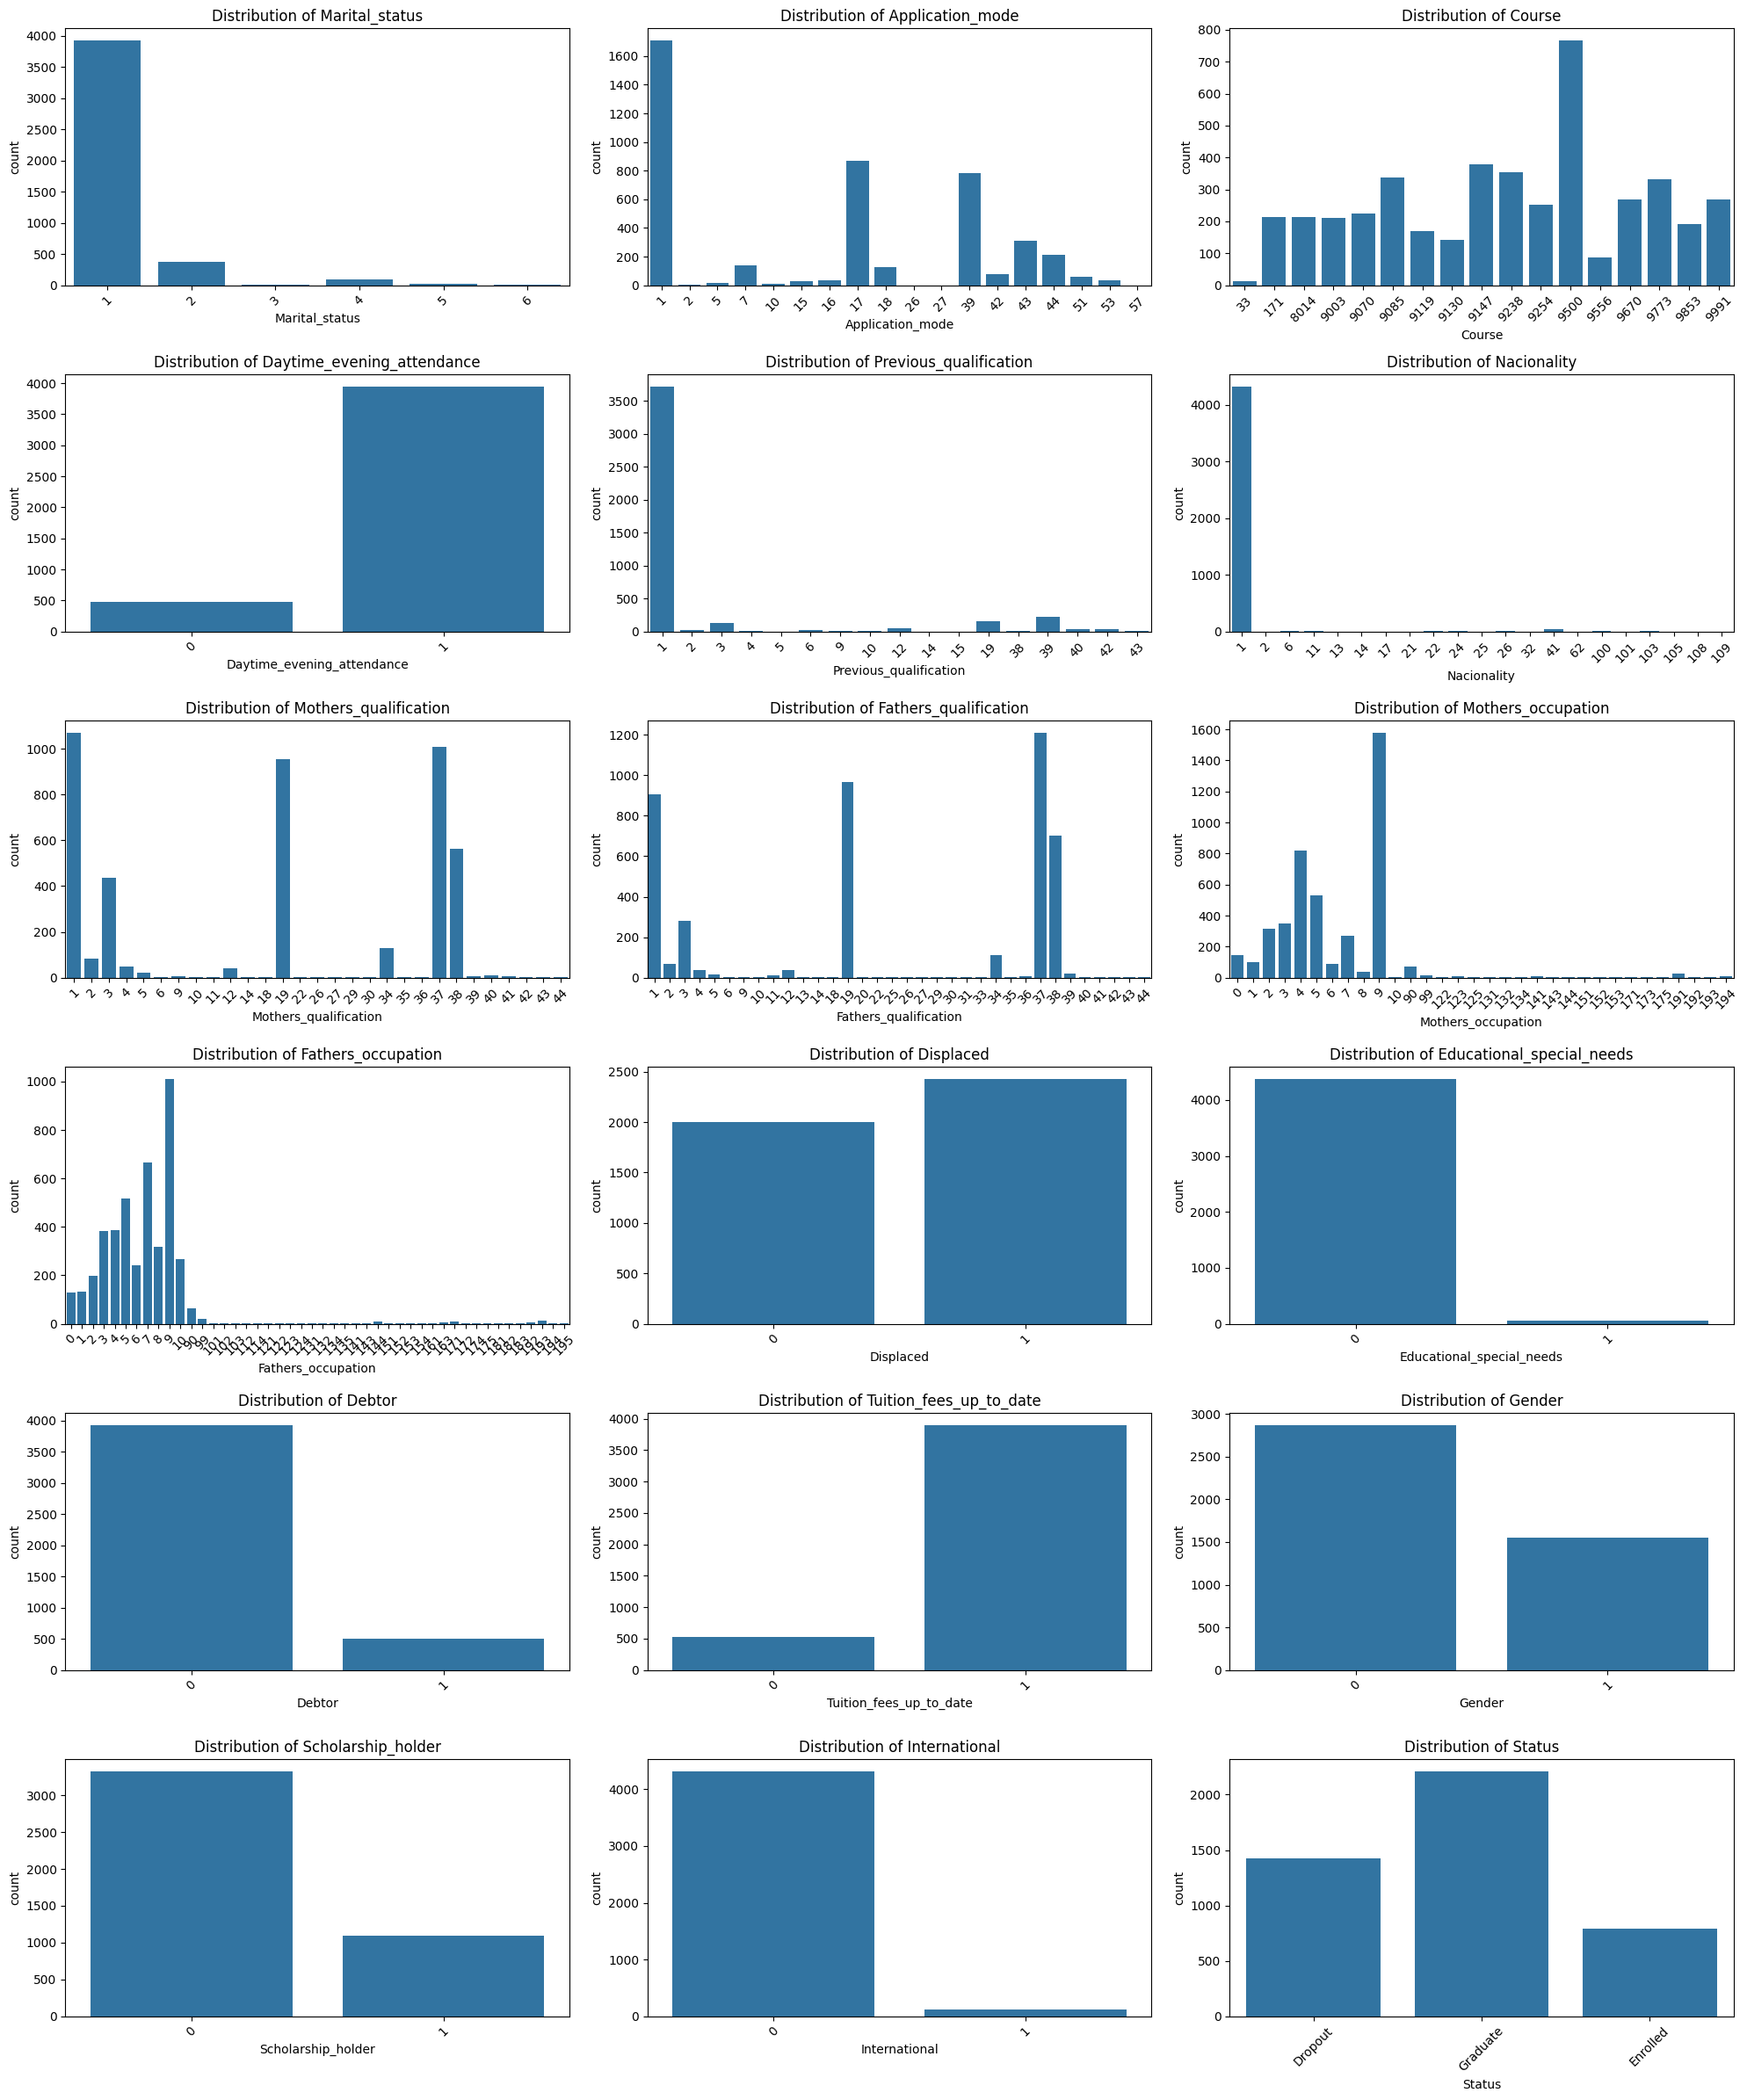

In [105]:
# 1.2 Analisis Variabel Kategorikal
def plot_categorical_distributions(df, variables, n_cols=3):
    n_vars = len(variables)
    n_rows = (n_vars + n_cols - 1) // n_cols
    
    fig = plt.figure(figsize=(20, 4*n_rows))
    for i, var in enumerate(variables, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.countplot(data=df, x=var)
        plt.title(f'Distribution of {var}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_categorical_distributions(df_raw, cat_cols)

Analysis of the categorical variable distributions reveals several important patterns:

1. **Student Demographics**:
   - **Marital Status**: Vast majority of students are single
   - **Gender**: Slightly higher proportion of female students
   - **Nationality**: Predominantly domestic students, with very few international students
   - **Displaced**: Almost equal split between displaced and non-displaced students
   - **Educational Special Needs**: Very few students require special educational needs

2. **Application Characteristics**:
   - **Application Mode**: Most common is the 1st phase - general contingent
   - **Course**: Relatively even distribution across courses, with some showing higher enrollment
   - **Scholarship Holder**: About 75% of students do not hold scholarships
   - **Daytime/Evening Attendance**: Majority attend daytime classes
   - **Tuition Fees**: Most students are up to date with their fees
   - **Debtor**: Small proportion of students are debtors

3. **Family Background**:
   - **Mother's/Father's Qualification**:
     - Three main peaks in both parents' education levels
     - Similar patterns between mothers and fathers
     - Most common levels are primary education, secondary education, and higher education
   
   - **Mother's/Father's Occupation**:
     - Diverse range of occupations
     - Some dominant categories in both parents
     - Notable proportion of unemployed or retired parents

4. **Academic Status**:
   - **Status Distribution**:
     - Largest group: Enrolled students
     - Second largest: Dropout students
     - Smallest group: Graduate students

5. **Key Insights**:
   - Strong domestic student presence
   - High proportion of traditional (daytime) students
   - Good financial compliance (low debtor rate)
   - Significant parental education diversity
   - Concerning dropout rate relative to graduation rate

## 2. EDA Bivariate

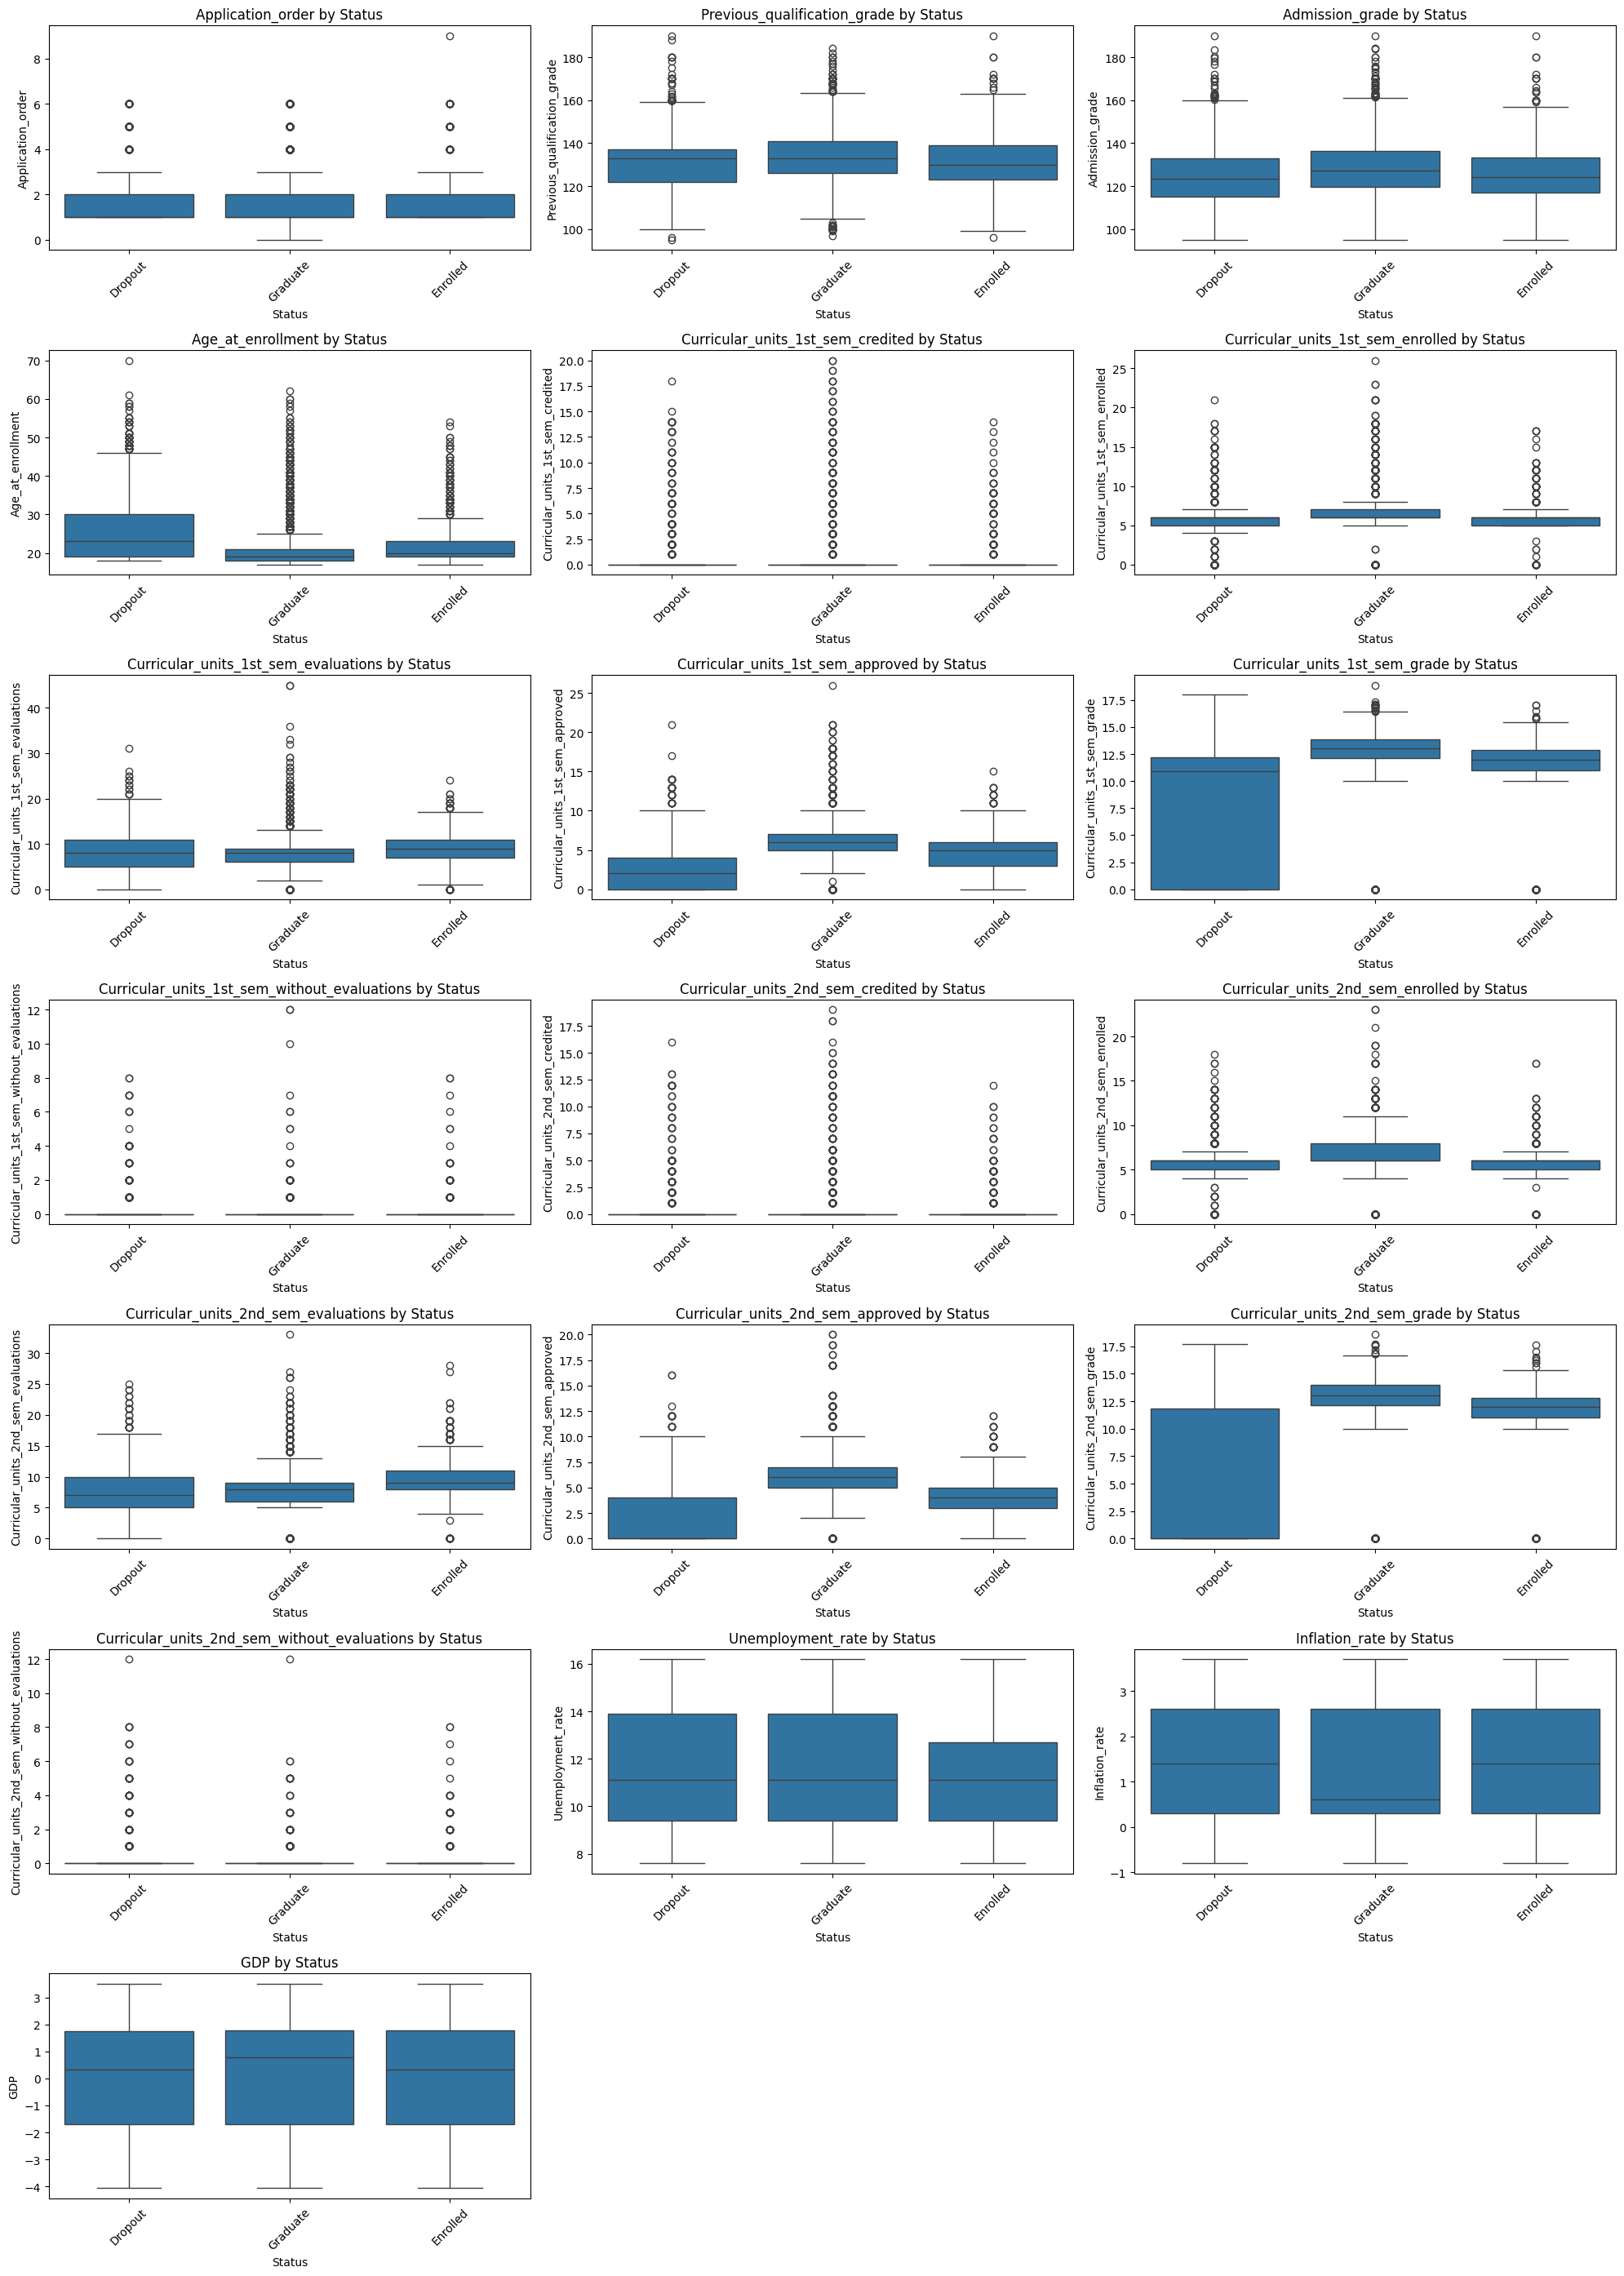

In [106]:
def plot_numeric_by_status(df, variables, n_cols=3):
    n_vars = len(variables)
    n_rows = (n_vars + n_cols - 1) // n_cols
    
    fig = plt.figure(figsize=(20, 4*n_rows))
    for i, var in enumerate(variables, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(data=df, x='Status', y=var)
        plt.title(f'{var} by Status')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_numeric_by_status(df_raw, num_cols)

Analysis of the relationships between student status (Dropout, Enrolled, Graduate) and numerical variables reveals several important patterns:

1. **Application and Qualification Metrics**:
   - **Application Order**: Similar median values across all status groups
   - **Previous Qualification Grade**: Graduates show slightly higher median grades
   - **Admission Grade**: Graduates have marginally higher admission grades

2. **Age and Demographics**:
   - **Age at Enrollment**: 
     - Dropouts tend to be slightly older
     - Graduates show the most compact age distribution
     - Several age outliers across all groups

3. **First Semester Performance**:
   - **Curricular Units Credited**: 
     - Graduates show higher median credits
     - Dropouts show the lowest credits earned
   - **Curricular Units Enrolled**: Similar across groups
   - **Evaluations**: 
     - Graduates have more consistent evaluation patterns
     - Dropouts show more variability
   - **Units Approved**: 
     - Clear distinction between groups
     - Graduates consistently higher
     - Dropouts significantly lower
   - **Grades**: 
     - Graduates maintain higher grades
     - Substantial overlap between enrolled and graduate students
     - Dropouts show lower performance

4. **Second Semester Patterns**:
   - Similar trends to first semester
   - **Grade Performance**: 
     - Maintained differences between groups
     - Slightly lower overall compared to first semester
   - **Units Approved**: 
     - Continued strong performance by graduates
     - Persistent low performance by dropouts

5. **Economic Indicators**:
   - **Unemployment Rate**: 
     - Similar distributions across groups
     - Slightly higher median for dropouts
   - **Inflation Rate**: 
     - Consistent across groups
     - Minor variations in spread
   - **GDP**: 
     - Similar distributions
     - No significant differences between groups

6. **Key Insights**:
   - Academic performance in first semester strongly indicates eventual status
   - Graduates consistently show better performance across most metrics
   - Economic factors show minimal correlation with student status
   - Age at enrollment might be a minor factor in dropout probability
   - Course load (units enrolled) similar across groups, but success rates differ significantly

## 3. EDA Academic Performance

/var/folders/s5/m528_dfj42ggvtqwcz6_rrgh0000gn/T/ipykernel_10277/249185045.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


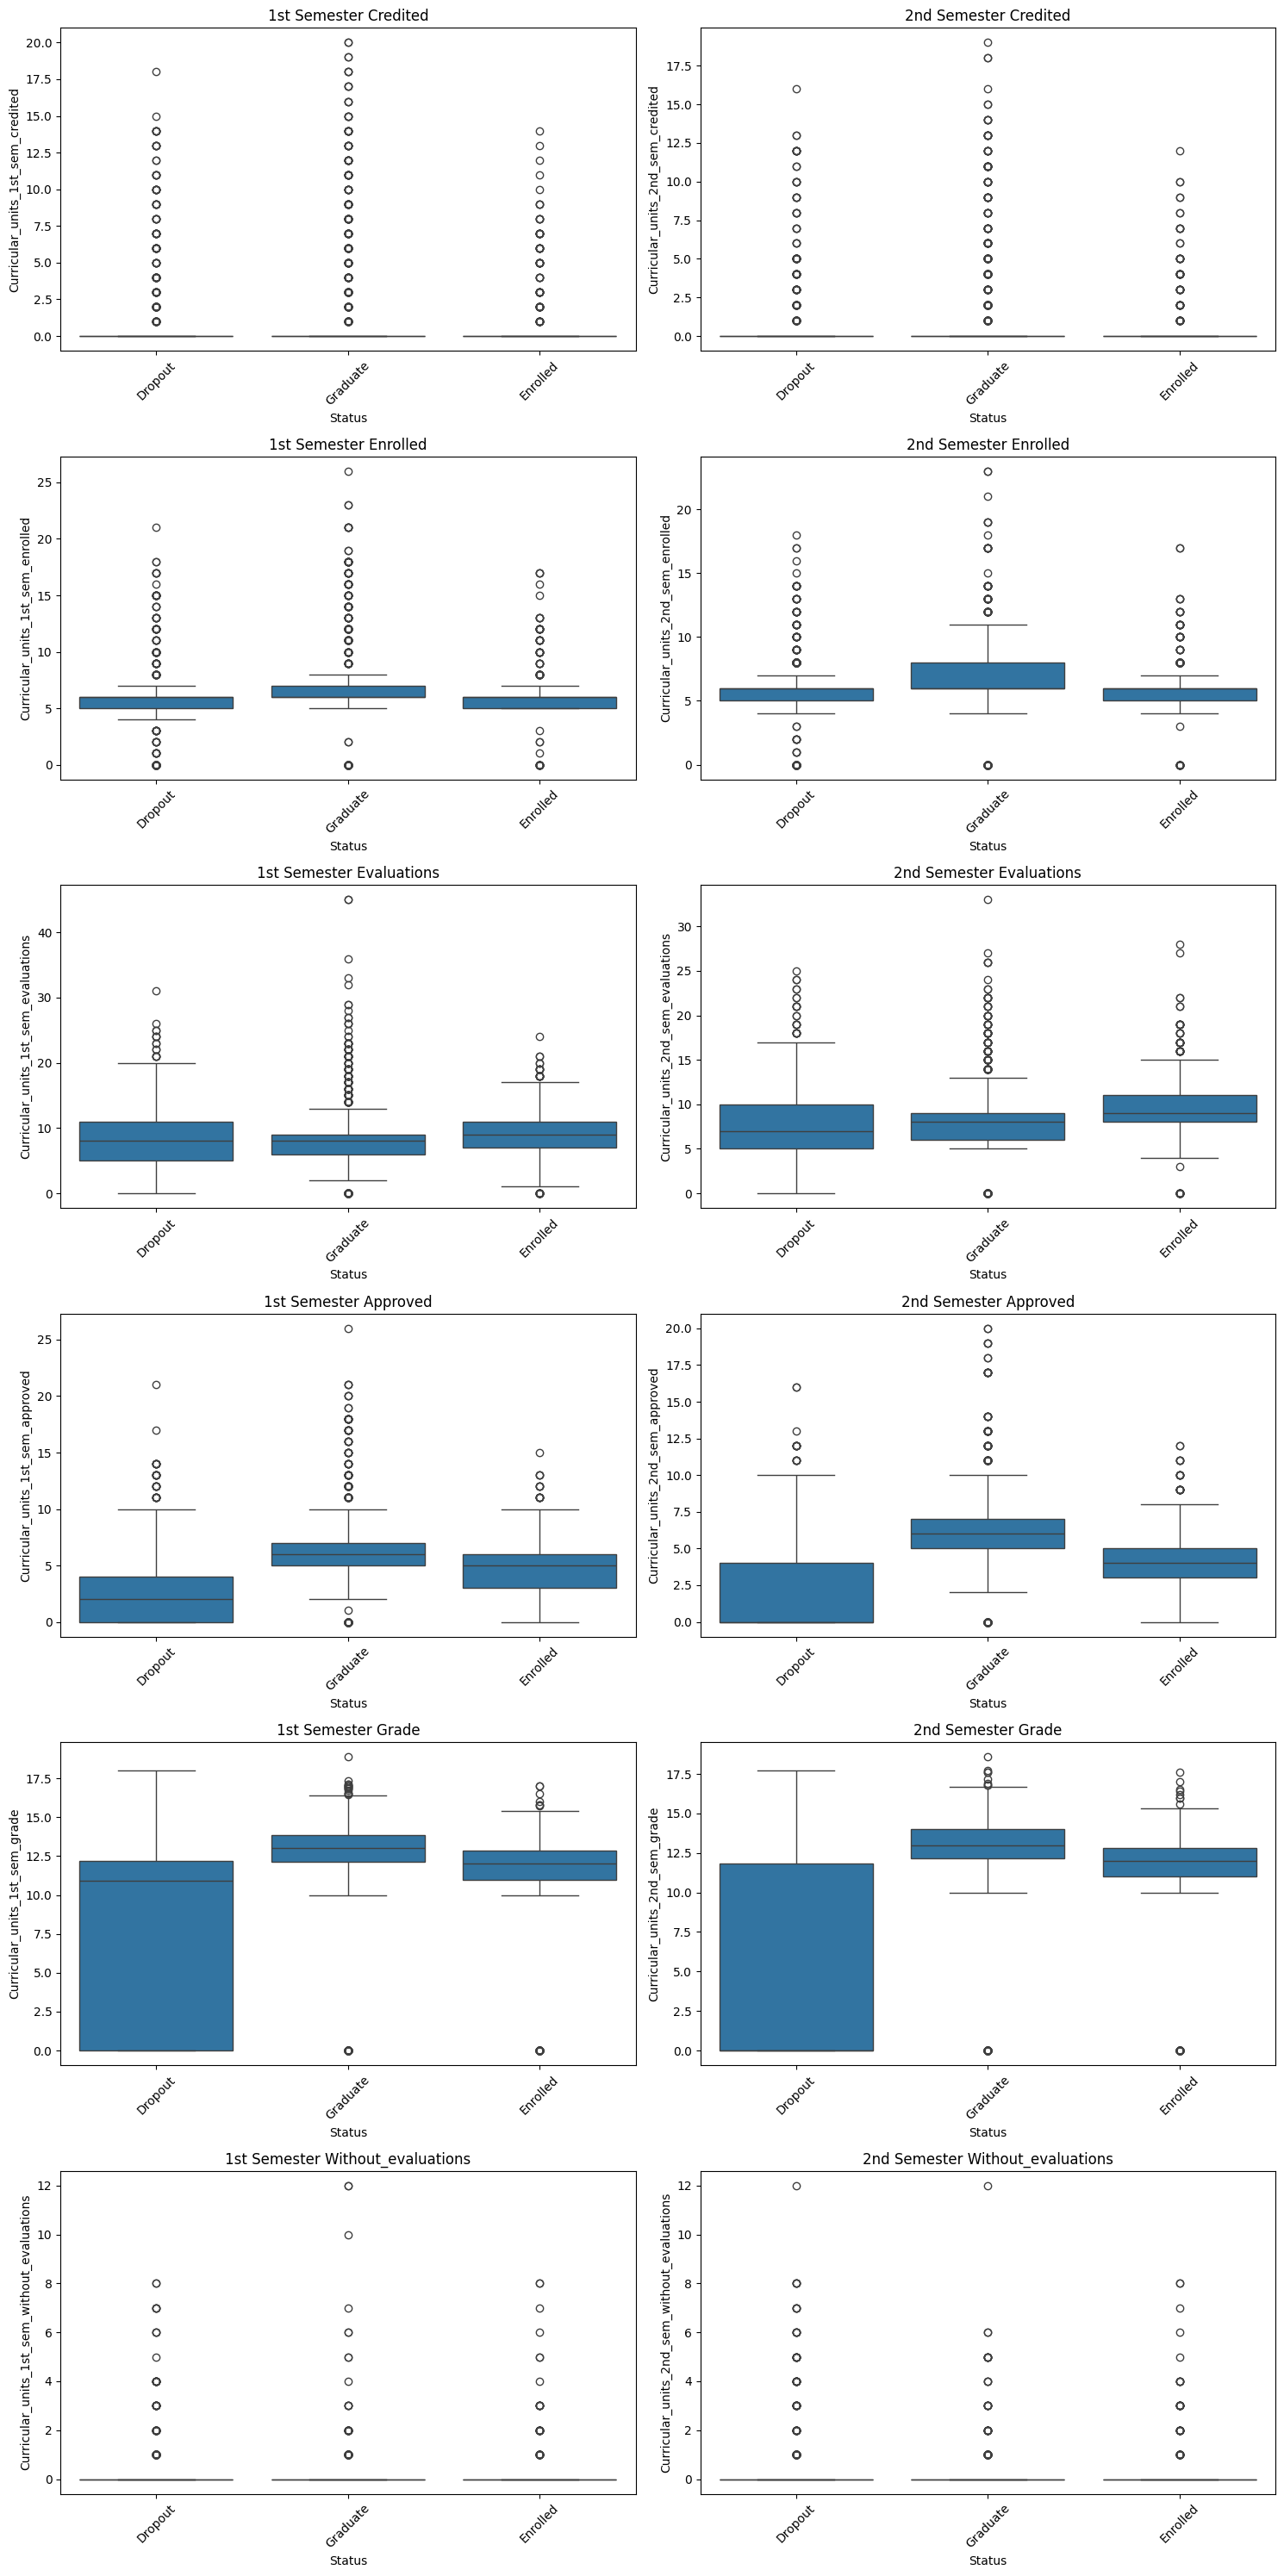

In [107]:
def plot_semester_comparison(df):
    metrics = ['credited', 'enrolled', 'evaluations', 'approved', 'grade', 'without_evaluations']
    n_cols = 2
    n_rows = len(metrics)
    
    fig = plt.figure(figsize=(15, 5*n_rows))
    for i, metric in enumerate(metrics, 1):
        # First semester
        plt.subplot(n_rows, n_cols, 2*i-1)
        sns.boxplot(data=df, x='Status', y=f'Curricular_units_1st_sem_{metric}')
        plt.title(f'1st Semester {metric.capitalize()}')
        plt.xticks(rotation=45)
        
        # Second semester
        plt.subplot(n_rows, n_cols, 2*i)
        sns.boxplot(data=df, x='Status', y=f'Curricular_units_2nd_sem_{metric}')
        plt.title(f'2nd Semester {metric.capitalize()}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    fig.show()

plot_semester_comparison(df_raw)

Detailed analysis of semester-wise academic performance metrics across student statuses (Dropout, Enrolled, Graduate):

1. **Credits (1st vs 2nd Semester)**:
   - **Pattern**: Very similar distribution between semesters
   - **Credited Units**:
     - Most students across all statuses have 0 credited units
     - Scattered outliers showing higher credits
     - No clear distinction between status groups

2. **Enrollment Patterns**:
   - **1st Semester**:
     - Relatively uniform enrollment across all status groups
     - Median around 6 units
     - Some outliers with higher enrollment
   - **2nd Semester**:
     - Slightly more variation in enrolled units
     - Enrolled students show marginally higher median
     - More outliers in the enrolled group

3. **Evaluations**:
   - **1st Semester**:
     - Wide range of evaluations (0-30)
     - Dropout students show lower median
     - More variability in enrolled students
   - **2nd Semester**:
     - Similar pattern to first semester
     - Slightly lower overall number of evaluations
     - Graduate students show more consistent evaluation patterns

4. **Approved Units**:
   - **1st Semester**:
     - Clear stratification between groups
     - Graduates: Highest approval rate
     - Dropouts: Significantly lower approvals
     - Enrolled: Middle range performance
   - **2nd Semester**:
     - Pattern continues from first semester
     - Slightly lower approval rates overall
     - Maintained distinction between groups

5. **Grades**:
   - **1st Semester**:
     - Graduates: Highest median grades
     - Dropouts: Notably lower grades
     - Enrolled: Middle range performance
     - Clear grade separation between groups
   - **2nd Semester**:
     - Similar pattern to first semester
     - Slightly lower overall grades
     - Maintained performance gaps between groups

6. **Without Evaluations**:
   - Both semesters show similar patterns
   - Most students have 0 units without evaluations
   - Scattered outliers across all status groups
   - No clear distinction between status groups

7. **Key Insights**:
   - First semester performance strongly indicates final status
   - Consistent patterns across both semesters
   - Clear performance hierarchy: Graduates > Enrolled > Dropouts
   - Early intervention might be crucial for potential dropouts
   - Credit accumulation doesn't strongly differentiate groups
   - Evaluation participation and success rates are key indicators

## 4. EDA Economic and Demographic

/var/folders/s5/m528_dfj42ggvtqwcz6_rrgh0000gn/T/ipykernel_10277/2580108265.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


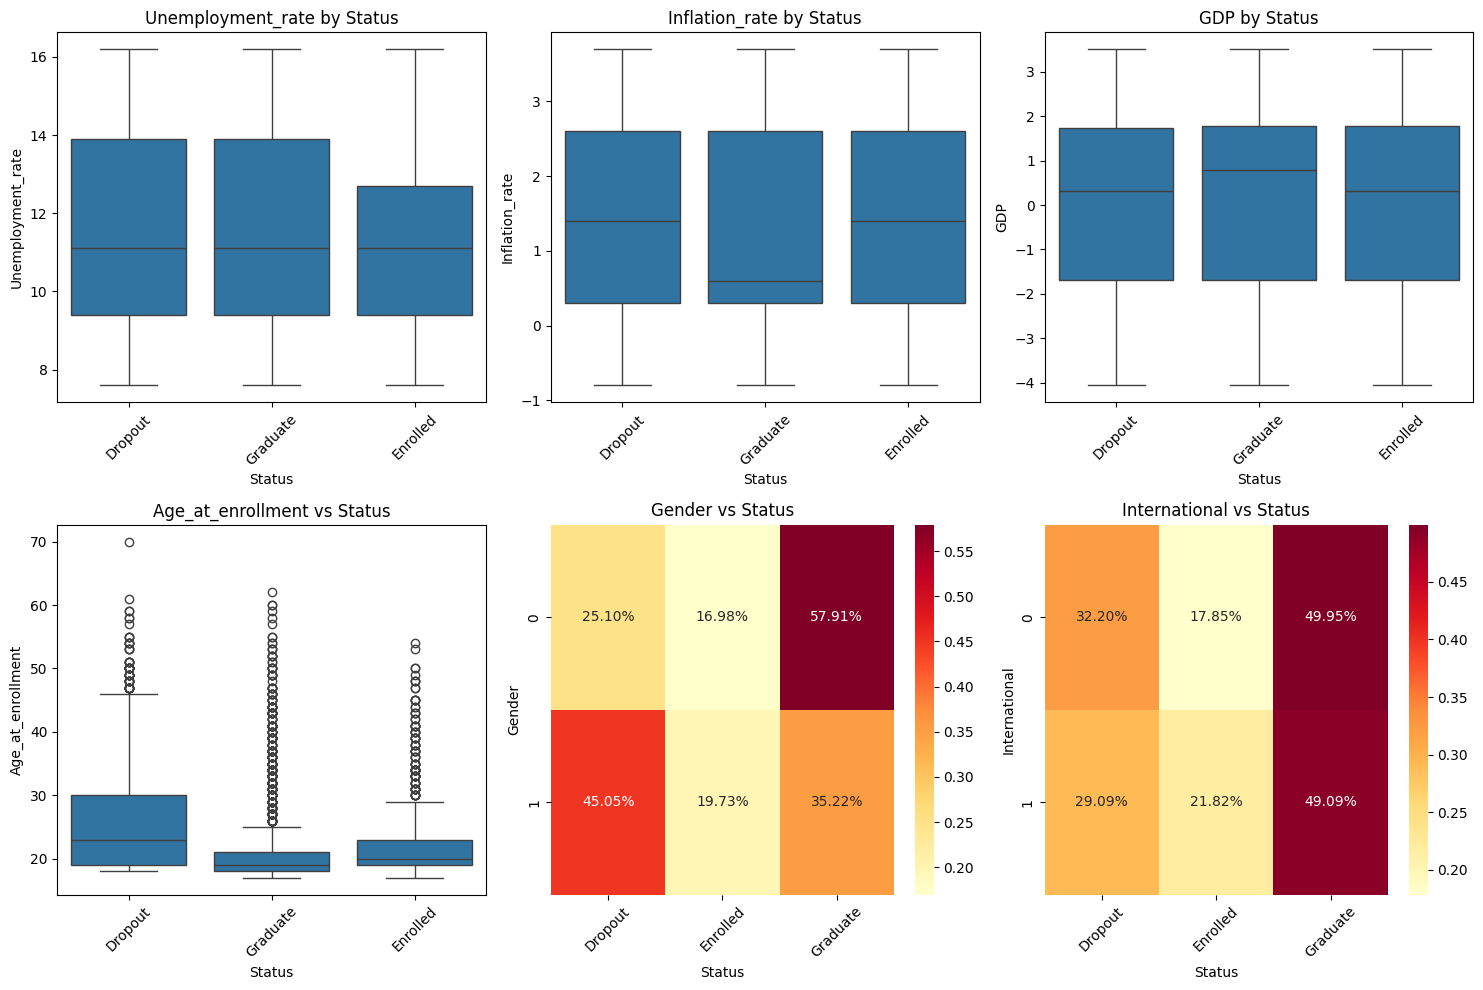

In [108]:
def plot_economic_demographic(df):
    fig = plt.figure(figsize=(15, 10))
    
    # Economic factors
    economic_vars = ['Unemployment_rate', 'Inflation_rate', 'GDP']
    for i, var in enumerate(economic_vars, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(data=df, x='Status', y=var)
        plt.title(f'{var} by Status')
        plt.xticks(rotation=45)
    
    # Demographic factors
    demographic_vars = ['Age_at_enrollment', 'Gender', 'International']
    for i, var in enumerate(demographic_vars, 1):
        plt.subplot(2, 3, i+3)
        if var == 'Age_at_enrollment':
            sns.boxplot(data=df, x='Status', y=var)
        else:
            sns.heatmap(pd.crosstab(df[var], df['Status'], normalize='index'),
                        annot=True, fmt='.2%', cmap='YlOrRd')
        plt.title(f'{var} vs Status')
        plt.xticks(rotation=45)
    plt.tight_layout()
    fig.show()

plot_economic_demographic(df_raw)


Analysis of economic indicators and demographic factors across student statuses reveals several important patterns:

1. **Economic Indicators**:

   a. **Unemployment Rate**:
   - Range: 7.6% to 16.2%
   - Median values:
     * Dropouts: ~11.1%
     * Graduates: ~11.0%
     * Enrolled: ~10.8%
   - Very similar distributions across all status groups
   - Slightly higher median for dropouts, but difference is minimal

   b. **Inflation Rate**:
   - Range: -0.8% to 3.7%
   - Median values around 1.4% for all groups
   - No significant differences between status groups
   - Similar spread and distribution patterns

   c. **GDP**:
   - Range: -4% to 3.5%
   - Median values close to 0.5% for all groups
   - Nearly identical distributions
   - No meaningful correlation with student status

2. **Demographic Factors**:

   a. **Age at Enrollment**:
   - Overall range: 17-70 years
   - Median ages:
     * Dropouts: Higher median (~22-23 years)
     * Graduates: Lowest median (~20 years)
     * Enrolled: Middle range (~21 years)
   - More outliers in dropout group
   - Younger students tend to graduate more often

   b. **Gender Distribution**:
   - Graduates:
     * Female: 57.91%
     * Male: 35.22%
   - Enrolled:
     * Female: 16.98%
     * Male: 19.73%
   - Dropouts:
     * Female: 25.10%
     * Male: 45.05%
   - Notable gender gap in outcomes
   - Females more likely to graduate
   - Males more likely to drop out

   c. **International Status**:
   - Graduates:
     * International: 49.95%
     * Domestic: 49.09%
   - Enrolled:
     * International: 17.85%
     * Domestic: 21.82%
   - Dropouts:
     * International: 32.20%
     * Domestic: 29.09%
   - Similar graduation rates between international and domestic students
   - Slightly higher dropout rate among international students

3. **Key Insights**:
   - Economic factors show minimal influence on student outcomes
   - Age at enrollment is a significant factor, with younger students showing better completion rates
   - Significant gender disparity in academic outcomes
   - International status has modest impact on student success
   - Early intervention might be particularly important for:
     * Older students
     * Male students
     * International students

## Data Preparation / Preprocessing

In [109]:
def analyze_feature_correlations(df, target='Status', alpha=0.05):
    # Define feature groups based on their types
    numeric_features = ['Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment',
                       'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled',
                       'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved',
                       'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations',
                       'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled',
                       'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved',
                       'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations',
                       'Unemployment_rate', 'Inflation_rate', 'GDP']
    
    ordinal_features = ['Previous_qualification', 'Mothers_qualification', 
                       'Fathers_qualification', 'Application_order']
    
    nominal_features = ['Course', 'Nacionality', 'Mothers_occupation', 'Fathers_occupation',
                       'Marital_status', 'Application_mode']
    
    binary_features = ['Daytime_evening_attendance', 'Displaced', 'Educational_special_needs',
                      'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
                      'International']
    
    # Initialize results list
    results = []
    
    # Function to calculate eta squared
    def calculate_eta_squared(feature, target_series):
        contingency_table = pd.crosstab(feature, target_series)
        chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        n = len(feature)
        eta_sq = chi2 / (n + chi2)
        return eta_sq, p_value
    
    # Analyze numeric features using Spearman correlation
    for feature in numeric_features:
        if feature in df.columns:
            correlation, p_value = stats.spearmanr(df[feature], pd.Categorical(df[target]).codes)
            results.append({
                'name_feature': feature,
                'method_corr': 'Spearman',
                'p_value': p_value,
                'significant_or_not': 'Significant' if p_value < alpha else 'Not Significant',
                'corr_value': abs(correlation)
            })
    
    # Analyze ordinal features using Kendall Tau correlation
    for feature in ordinal_features:
        if feature in df.columns:
            correlation, p_value = stats.kendalltau(pd.Categorical(df[feature]).codes, 
                                                   pd.Categorical(df[target]).codes)
            results.append({
                'name_feature': feature,
                'method_corr': 'Kendall',
                'p_value': p_value,
                'significant_or_not': 'Significant' if p_value < alpha else 'Not Significant',
                'corr_value': abs(correlation)
            })
    
    # Analyze nominal and binary features using Chi-square and Eta squared
    for feature in nominal_features + binary_features:
        if feature in df.columns:
            eta_sq, p_value = calculate_eta_squared(df[feature], df[target])
            results.append({
                'name_feature': feature,
                'method_corr': 'Chi-square (Eta-squared)',
                'p_value': p_value,
                'significant_or_not': 'Significant' if p_value < alpha else 'Not Significant',
                'corr_value': eta_sq
            })
    
    # Create DataFrame and sort by correlation value
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('corr_value', ascending=False)
    
    # Round numeric columns
    results_df['p_value'] = results_df['p_value'].round(4)
    results_df['corr_value'] = results_df['corr_value'].round(4)
    
    return results_df

# Calculate correlations
analyze_feature_correlations(df_raw)

,name_feature,method_corr,p_value,significant_or_not,corr_value
12,Curricular_units_2nd_sem_approved,Spearman,0.0000,Significant,0.6540
6,Curricular_units_1st_sem_approved,Spearman,0.0000,Significant,0.5942
13,Curricular_units_2nd_sem_grade,Spearman,0.0000,Significant,0.5598
7,Curricular_units_1st_sem_grade,Spearman,0.0000,Significant,0.4973
2,Age_at_enrollment,Spearman,0.0000,Significant,0.2849
10,Curricular_units_2nd_sem_enrolled,Spearman,0.0000,Significant,0.2415
4,Curricular_units_1st_sem_enrolled,Spearman,0.0000,Significant,0.2306
32,Tuition_fees_up_to_date,Chi-square (Eta-squared),0.0000,Significant,0.1569
1,Admission_grade,Spearman,0.0000,Significant,0.1258
18,Previous_qualification,Kendall,0.0000,Significant,0.1156


We are going to use only the significant features to predict the target.

In [110]:
# Memisahkan fitur numerik dan kategorikal
num_features = ['Curricular_units_2nd_sem_approved',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_grade',
    'Age_at_enrollment',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_1st_sem_enrolled',
    'Admission_grade',
    'Previous_qualification_grade',
    'Curricular_units_2nd_sem_without_evaluations',
    'Curricular_units_1st_sem_without_evaluations',
    'GDP',
    'Curricular_units_2nd_sem_credited']

cat_features = ['Previous_qualification',
    'Application_order', 'Tuition_fees_up_to_date',
    'Course',
    'Application_mode',
    'Scholarship_holder',
    'Mothers_occupation',
    'Fathers_occupation',
    'Debtor',
    'Gender',
    'Marital_status',
    'Displaced',
    'Daytime_evening_attendance']

In [111]:
def check_categorical_values(df, cat_features):
    """Fungsi untuk memeriksa nilai unik kolom kategorikal
    
    Parameters:
    df (pandas.DataFrame): DataFrame yang akan diperiksa
    cat_features (list): List kolom kategorikal yang akan diperiksa
    
    Returns:
    pandas.DataFrame: DataFrame berisi informasi nilai unik
    """
    # Membuat dictionary untuk menyimpan hasil
    unique_info = {
        'Feature': [],
        'Unique_Values': [],
        'Values': []
    }
    
    # Mengiterasi setiap fitur kategorikal
    for feature in cat_features:
        # Mendapatkan nilai unik
        unique_values = sorted(df[feature].unique())
        
        # Menyimpan informasi
        unique_info['Feature'].append(feature)
        unique_info['Unique_Values'].append(len(unique_values))
        unique_info['Values'].append(unique_values)
    
    # Membuat DataFrame hasil
    result_df = pd.DataFrame(unique_info)
    
    return result_df

check_categorical_values(df_raw, cat_features)

,Feature,Unique_Values,Values
0,Previous_qualification,17,"[1, 2, 3, 4, 5, 6, 9, 10, 12, 14, 15, 19, 38, ..."
1,Application_order,8,"[0, 1, 2, 3, 4, 5, 6, 9]"
2,Tuition_fees_up_to_date,2,"[0, 1]"
3,Course,17,"[33, 171, 8014, 9003, 9070, 9085, 9119, 9130, ..."
4,Application_mode,18,"[1, 2, 5, 7, 10, 15, 16, 17, 18, 26, 27, 39, 4..."
5,Scholarship_holder,2,"[0, 1]"
6,Mothers_occupation,32,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 90, 99, 122..."
7,Fathers_occupation,46,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 90, 99, 101..."
8,Debtor,2,"[0, 1]"
9,Gender,2,"[0, 1]"


In [112]:
# Define feature groups with significant correlations only
binary_features = ['Daytime_evening_attendance', 'Displaced',
                  'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder']

nominal_features = ['Course', 'Mothers_occupation', 'Fathers_occupation',
                   'Marital_status', 'Application_mode']

ordinal_features = {
    'Previous_qualification': sorted([1, 2, 3, 4, 5, 6, 9, 10, 12, 14, 15, 19, 38, 39, 40, 42, 43]),
    'Application_order': sorted(list(range(10)))
}

In [113]:
# Split data first to prevent data leakage
X = df_raw.drop('Status', axis=1)
y = df_raw['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [114]:
# Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [115]:
# Initialize transformers
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler = StandardScaler()

In [116]:
# Gabungkan fitur nominal dan binary
categorical_features = nominal_features + binary_features

# One-hot encode semua fitur kategorikal (nominal + binary)
X_train_categorical = onehot.fit_transform(X_train[categorical_features])
X_test_categorical = onehot.transform(X_test[categorical_features])
categorical_feature_names = onehot.get_feature_names_out(categorical_features)


In [117]:
# Tentukan urutan kategori untuk masing-masing fitur ordinal
ordinal_feature_names = ['Previous_qualification', 'Mothers_qualification', 'Fathers_qualification', 'Application_order']
ordinal_categories = [
    sorted(df_raw['Previous_qualification'].unique()),
    sorted(df_raw['Mothers_qualification'].unique()),
    sorted(df_raw['Fathers_qualification'].unique()),
    sorted(df_raw['Application_order'].unique())
]

# Inisialisasi dan fit global OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
X_train_ord = ordinal_encoder.fit_transform(X_train[ordinal_feature_names])
X_test_ord = ordinal_encoder.transform(X_test[ordinal_feature_names])

In [118]:
# Scale numeric features
X_train_scaled = scaler.fit_transform(X_train[num_features])
X_test_scaled = scaler.transform(X_test[num_features])

In [119]:
# Initialize PCA - keep 95% of variance
pca = PCA(n_components=0.95)

# Fit and transform numeric features
X_train_numeric_pca = pca.fit_transform(X_train_scaled)
X_test_numeric_pca = pca.transform(X_test_scaled)

# Convert PCA results to DataFrame
pca_columns = [f'PC{i+1}' for i in range(X_train_numeric_pca.shape[1])]
X_train_numeric_pca = pd.DataFrame(X_train_numeric_pca, columns=pca_columns, index=X_train.index)
X_test_numeric_pca = pd.DataFrame(X_test_numeric_pca, columns=pca_columns, index=X_test.index)

# Print variance explained
print(f"Number of components selected: {pca.n_components_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.3f}")

Number of components selected: 9
Total variance explained: 0.965


In [120]:
X_train_numeric_pca = pd.DataFrame(X_train_numeric_pca, index=X_train.index)
X_test_numeric_pca = pd.DataFrame(X_test_numeric_pca, index=X_test.index)
X_train_categorical = pd.DataFrame(X_train_categorical, index=X_train.index)
X_test_categorical = pd.DataFrame(X_test_categorical, index=X_test.index)
X_train_ord = pd.DataFrame(X_train_ord, index=X_train.index)
X_test_ord = pd.DataFrame(X_test_ord, index=X_test.index)

X_train_processed = pd.concat([X_train_numeric_pca, X_train_categorical, X_train_ord], axis=1)
X_test_processed = pd.concat([X_test_numeric_pca, X_test_categorical, X_test_ord], axis=1)

print("\nFinal feature set shape:")
print(f"Training set: {X_train_processed.shape}")
print(f"Test set: {X_test_processed.shape}")


Final feature set shape:
Training set: (3539, 138)
Test set: (885, 138)


In [121]:
X_train_processed.columns = X_train_processed.columns.astype(str)
X_test_processed.columns = X_test_processed.columns.astype(str)

## Modeling

In [122]:
# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

In [123]:
# Make predictions for both sets
y_train_pred = rf_model.predict(X_train_processed)
y_test_pred = rf_model.predict(X_test_processed)

## Evaluation

For imbalanced datasets, we should focus on the weighted average F1-score because:

1. Weighted Average F1-score (0.69):
   
   - Combines both precision and recall into a single metric
   - Accounts for class imbalance by weighting each class's contribution by its support size
   - More reliable than accuracy for imbalanced datasets
   - Formula: F1 = 2 * (precision * recall) / (precision + recall)

In [124]:
# Print classification reports
print("\nRandom Forest Classification Report - Training Set:")
print(classification_report(y_train, y_train_pred))
print("\nRandom Forest Classification Report - Test Set:")
print(classification_report(y_test, y_test_pred))


Random Forest Classification Report - Training Set:
              precision    recall  f1-score   support

     Dropout       1.00      1.00      1.00      1137
    Enrolled       1.00      1.00      1.00       635
    Graduate       1.00      1.00      1.00      1767

    accuracy                           1.00      3539
   macro avg       1.00      1.00      1.00      3539
weighted avg       1.00      1.00      1.00      3539


Random Forest Classification Report - Test Set:
              precision    recall  f1-score   support

     Dropout       0.75      0.74      0.75       284
    Enrolled       0.52      0.19      0.28       159
    Graduate       0.75      0.93      0.83       442

    accuracy                           0.73       885
   macro avg       0.67      0.62      0.62       885
weighted avg       0.71      0.73      0.70       885



Let's improve the model with hyperparameter tuning, focusing on weighted F1-score:

In [125]:
# 1. First, let's train a model to select important features
feature_selector = RandomForestClassifier(n_estimators=100, random_state=42)
feature_selector.fit(X_train_processed, y_train)

# Select features using mean decrease in impurity
selection = SelectFromModel(feature_selector, prefit=True, threshold='mean')

# Get selected feature indices and transform data
X_train_selected = selection.transform(X_train_processed)
X_test_selected = selection.transform(X_test_processed)

# 2. Now define a stronger regularization grid
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [6, 8, 10],  # Reduced max_depth
    'min_samples_split': [10, 15, 20],  # Increased min_samples_split
    'min_samples_leaf': [4, 6, 8],  # Increased min_samples_leaf
    'max_features': ['sqrt', 'log2'],  # Control number of features
    'class_weight': ['balanced'],
    'bootstrap': [True],
    'oob_score': [True]  # Enable out-of-bag score
}

# Initialize Random Forest with stronger regularization
rf = RandomForestClassifier(random_state=42)

# Perform grid search with cross validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

# Fit grid search on selected features
grid_search.fit(X_train_selected, y_train)

# Print best parameters
print("Best parameters:", grid_search.best_params_)

# Get best model
best_rf = grid_search.best_estimator_

# Evaluate on training set
y_train_pred = best_rf.predict(X_train_selected)
print("\nRandom Forest Classification Report - Training Set:")
print(classification_report(y_train, y_train_pred))

# Evaluate on test set
y_test_pred = best_rf.predict(X_test_selected)
print("\nRandom Forest Classification Report - Test Set:")
print(classification_report(y_test, y_test_pred))

# Print out-of-bag score
print(f"\nOut-of-bag score: {best_rf.oob_score_:.3f}")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200, 'oob_score': True}

Random Forest Classification Report - Training Set:
              precision    recall  f1-score   support

     Dropout       0.93      0.80      0.86      1137
    Enrolled       0.66      0.81      0.73       635
    Graduate       0.89      0.90      0.90      1767

    accuracy                           0.85      3539
   macro avg       0.83      0.84      0.83      3539
weighted avg       0.86      0.85      0.85      3539


Random Forest Classification Report - Test Set:
              precision    recall  f1-score   support

     Dropout       0.83      0.68      0.75       284
    Enrolled       0.40      0.53      0.46       159
    Graduate       0.81      0.81      0.81       442

    accuracy                           0.72       885
   macro avg       0.68      0.67      0.67       8

We are going to use XGBoost to create comparison models.

In [128]:
# Split data into training and validation sets
X_train_main, X_val, y_train_main, y_val = train_test_split(
    X_train_processed, y_train_encoded, 
    test_size=0.2, 
    random_state=42,
    stratify=y_train_encoded
)

# Define XGBoost parameters
xgb_params = {
    'max_depth': 4,
    'min_child_weight': 5,
    'eta': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'multi:softprob',
    'num_class': 3,
    'eval_metric': 'mlogloss',
    'use_label_encoder': False
}

# Initialize model
xgb = XGBClassifier(
    **xgb_params,
    n_estimators=1000,
    early_stopping_rounds=50,
    random_state=42
)

# Train with early stopping
xgb.fit(
    X_train_main.values, y_train_main,
    eval_set=[(X_train_main.values, y_train_main), (X_val.values, y_val)],
    verbose=100
)

y_train_pred = xgb.predict(X_train_processed.values)
y_test_pred = xgb.predict(X_test_processed.values)

# Convert predictions back to original labels for interpretation
print("\nClassification Report with Original Labels - Training Set:")
print(classification_report(y_train, le.inverse_transform(y_train_pred)))

print("\nClassification Report with Original Labels - Test Set:")
print(classification_report(y_test, le.inverse_transform(y_test_pred)))

[0]	validation_0-mlogloss:1.09223	validation_1-mlogloss:1.09249


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [01:27:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-mlogloss:0.74569	validation_1-mlogloss:0.76740
[200]	validation_0-mlogloss:0.62419	validation_1-mlogloss:0.66766
[300]	validation_0-mlogloss:0.56334	validation_1-mlogloss:0.62823
[400]	validation_0-mlogloss:0.52299	validation_1-mlogloss:0.60886
[500]	validation_0-mlogloss:0.49399	validation_1-mlogloss:0.59935
[600]	validation_0-mlogloss:0.46974	validation_1-mlogloss:0.59244
[700]	validation_0-mlogloss:0.44935	validation_1-mlogloss:0.58836
[800]	validation_0-mlogloss:0.43159	validation_1-mlogloss:0.58606
[900]	validation_0-mlogloss:0.41431	validation_1-mlogloss:0.58460
[999]	validation_0-mlogloss:0.39929	validation_1-mlogloss:0.58373

Classification Report with Original Labels - Training Set:
              precision    recall  f1-score   support

     Dropout       0.91      0.82      0.86      1137
    Enrolled       0.77      0.55      0.64       635
    Graduate       0.83      0.96      0.89      1767

    accuracy                           0.84      3539
   macro

From the weigthed avg of f1-score, we can see that XGBoost is better than Random Forest. So we choose XGBoost.

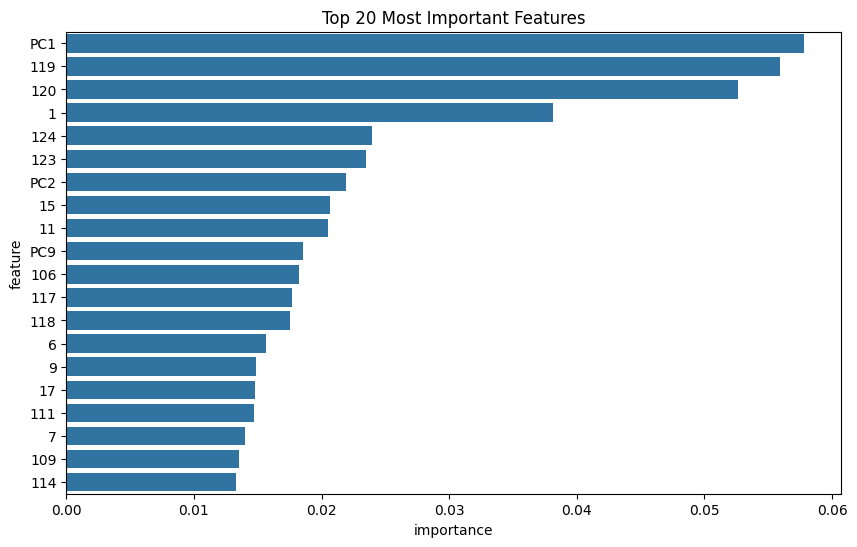

In [129]:
# Plot feature importance
feature_importance = pd.DataFrame({
    'feature': X_train_processed.columns,
    'importance': xgb.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 20 Most Important Features')
plt.show()




          
Based on the XGBoost classification report, the final XGBoost model achieved:

- Training set weighted avg F1-score: 0.86
- Test set weighted avg F1-score: 0.75

While the model shows improvement over the Random Forest model, there is still room for enhancement. **Despite the current overfitting issues and time limitations of this submission project, here are several recommendations for future improvements**:

1. Data Enhancement:
   - Add more temporal features (e.g., study patterns over time)
   - Include additional external factors (e.g., detailed socioeconomic indicators)

2. Feature Engineering:
   - Create interaction features between academic performance indicators
   - Develop composite features combining related variables
   - Apply more sophisticated feature selection techniques (e.g., LASSO, Elastic Net)

3. Model Improvements:
   - Implement stacking with diverse base models (e.g., LightGBM, CatBoost)
   - Use neural networks for automatic feature extraction

4. Hyperparameter Optimization:
   - Use Bayesian Optimization for more thorough parameter tuning
   - Implement cross-validation with stratification
   - Try different learning rate schedules

5. Model Interpretability:
   - Apply SHAP (SHapley Additive exPlanations) values for better feature importance understanding
   - Create rule-based explanations for predictions

6. Deployment Considerations:
   - Implement model monitoring for performance drift
   - Create an automated retraining pipeline
   - Develop a more robust validation strategy

7. Domain-Specific Enhancements:
   - Incorporate curriculum difficulty metrics
   - Add student engagement indicators

These improvements could help address the current limitations and potentially enhance the model's performance, particularly for the challenging 'Enrolled' class predictions.

In [130]:
# Save LabelEncoder
with open('model/label_encoder.pkl', 'wb') as file:
    pickle.dump(le, file)

# Save OneHotEncoder for nominal features
with open('model/onehot_encoder.pkl', 'wb') as file:
    pickle.dump(onehot, file)

# Save StandardScaler
with open('model/standard_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save the best XGBoost model
with open('model/xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

# Save binary features
with open('model/binary_features.txt', 'w') as f:
    f.write('\n'.join(binary_features))

# Save nominal features
with open('model/nominal_features.txt', 'w') as f:
    f.write('\n'.join(nominal_features))


# Save numeric features
with open('model/numeric_features.txt', 'w') as f:
    f.write('\n'.join(num_features))

# Save PCA transformer
with open('model/pca_transformer.pkl', 'wb') as file:
    pickle.dump(pca, file)

# Simpan fitur dan encoder
with open('model/ordinal_features.txt', 'w') as f:
    f.writelines('\n'.join(ordinal_feature_names))

with open('model/ordinal_encoder.pkl', 'wb') as f:
    pickle.dump(ordinal_encoder, f)